<b> Atividade 5</b> 

<b> EXERCÍCIO 1</b>

Implementar um algoritmo em Octave ( deve enviar o Algoritmo implemntado em Octave( ou em Outra linguagem)) que determine os coeficientes de polinômio interpolação de qualquer grau para uma função qualquer, podendo ser dada na forma analitica ou tabelada e plote os gáficos da função original e do polinômio obtido. Note que, para a plotagem da função, a forma de Honer, disponivel na função fPnH. m deverá ser utilizada.

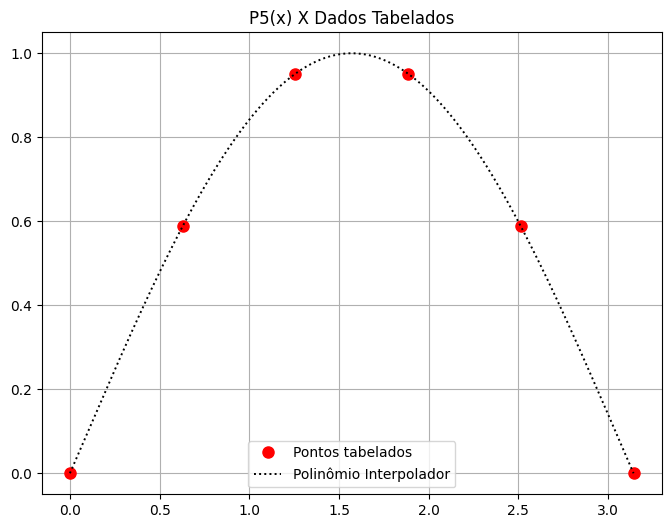

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def gauss_elimination(A, b):
    """
    Resolve um sistema linear Ax = b usando eliminação de Gauss.
    """
    n = len(b)
    # Eliminação de Gauss
    for i in range(n):
        # Pivotamento
        max_row = np.argmax(np.abs(A[i:n, i])) + i
        A[[i, max_row]] = A[[max_row, i]]
        b[i], b[max_row] = b[max_row], b[i]
        
        # Eliminação
        for j in range(i+1, n):
            ratio = A[j, i] / A[i, i]
            A[j, i:] -= ratio * A[i, i:]
            b[j] -= ratio * b[i]

    # Substituição reversa
    x = np.zeros_like(b)
    for i in range(n-1, -1, -1):
        x[i] = (b[i] - np.dot(A[i, i+1:], x[i+1:])) / A[i, i]
    return x

def fpn_h(n, Pn, x):
    """
    Avalia o polinômio interpolador Pn na forma de Horner.
    """
    result = Pn[-1]
    for i in range(n-1, -1, -1):
        result = Pn[i] + (x * result)
    return result

def exercicio01(n, limites, modo_entrada, *args):
    """
    Função principal para calcular o polinômio interpolador e plotar o gráfico.
    """
    if modo_entrada == 'fun_anl':  # A entrada é uma função
        f = args[0]
        x = np.linspace(limites[0], limites[1], n+1)
        y = f(x)
    elif modo_entrada == 'table':  # A entrada é uma tabela de dados
        x = args[0]
        y = args[1]
    
    # Matrizes do sistema
    dataX = np.zeros((n+1, n+1))
    dataY = np.zeros(n+1)
    
    for i in range(n+1):
        for j in range(n+1):
            dataX[i, j] = x[i]**(j)
        dataY[i] = y[i]
    
    # Resolução do sistema linear
    Pn = gauss_elimination(dataX, dataY)
    
    # Plotando o gráfico
    plt.figure(figsize=(8, 6))
    plt.plot(x, y, 'or', linewidth=1.4, markersize=8, label="Pontos tabelados")
    
    x_fine = np.linspace(limites[0], limites[1], 1000)
    y_interp = fpn_h(n, Pn, x_fine)
    plt.plot(x_fine, y_interp, ':k', linewidth=1.4, label="Polinômio Interpolador")
    
    plt.legend(loc='lower center')
    plt.title(f'P{n}(x) X Dados Tabelados')
    plt.grid(True)
    plt.show()

# Exemplo de uso:

# Função exemplo (pode ser alterada)
def exemplo_func(x):
    return np.sin(x)

# Parâmetros
n = 5  # Número de pontos de interpolação
limites = [0, np.pi]  # Intervalo de interpolação

# Chamar a função com uma função analítica
exercicio01(n, limites, 'fun_anl', exemplo_func)

# Chamar a função com dados tabelados
# x_table = np.linspace(0, np.pi, n+1)
# y_table = exemplo_func(x_table)
# exercicio01(n, limites, 'table', x_table, y_table)


<b> EXERCÍCIO 2</b>

Utilizando o algoritmo implentado, aproxime as seguintes funções, nos intervalos mostrados através de um polinômino de 2°, 4° e 6° graus. <b> Plote em um mesmo gráfico a função e o polinômio interpolador ( utilize o código fornecido no Mooodle). Plote em outro gráfico o erro de interpolação, como função de x.</b>

A)
$$
 f(x) = sin(x) x ∈ [0,\pi ]
$$

B)
$$
 f(x) = ln(x) x ∈ [1,3 ]
$$

C)
$$
 f(x) = ln(x) x ∈ [0.1,2.1]
$$



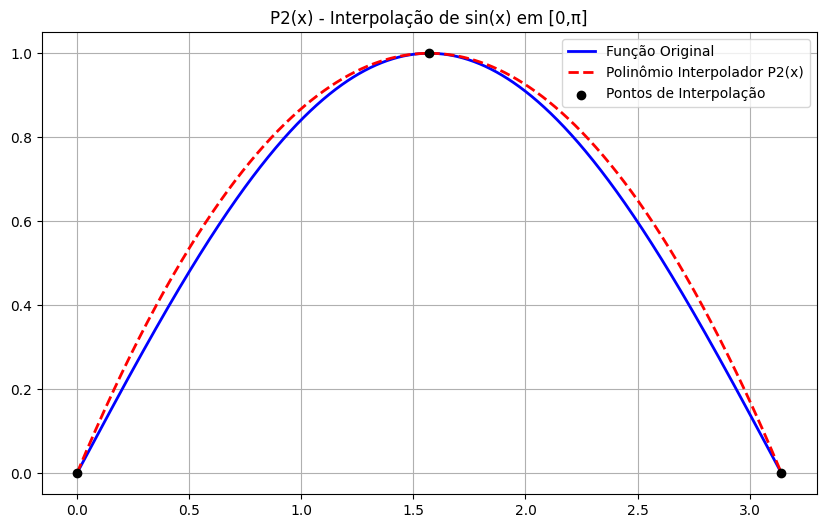

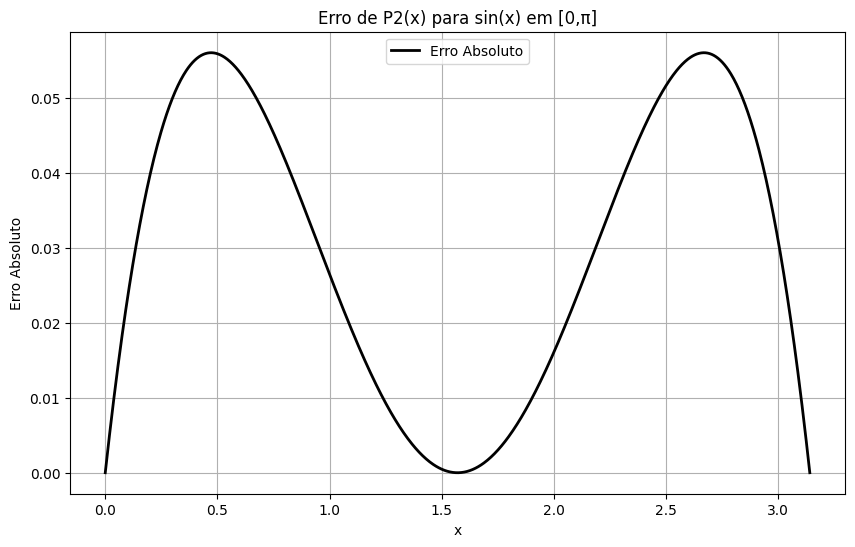

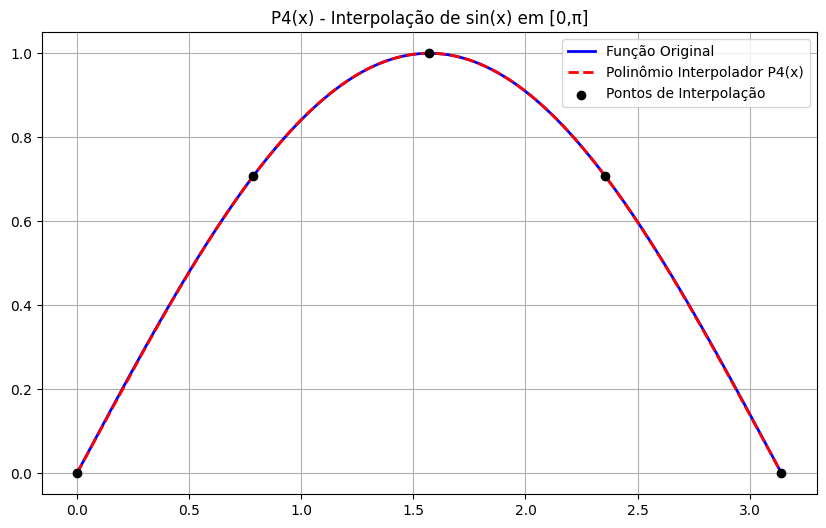

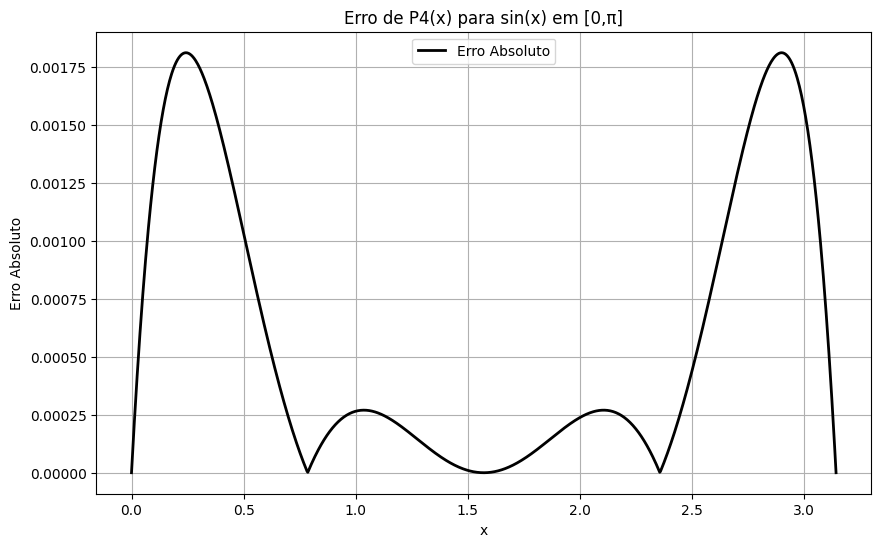

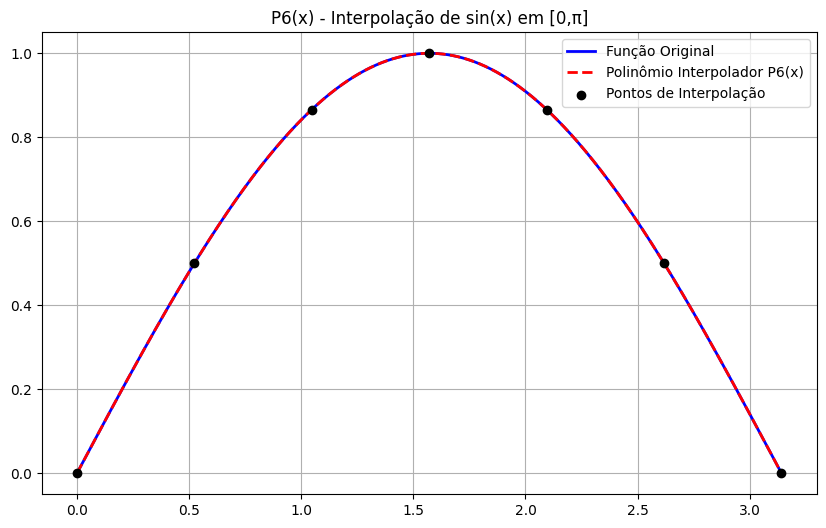

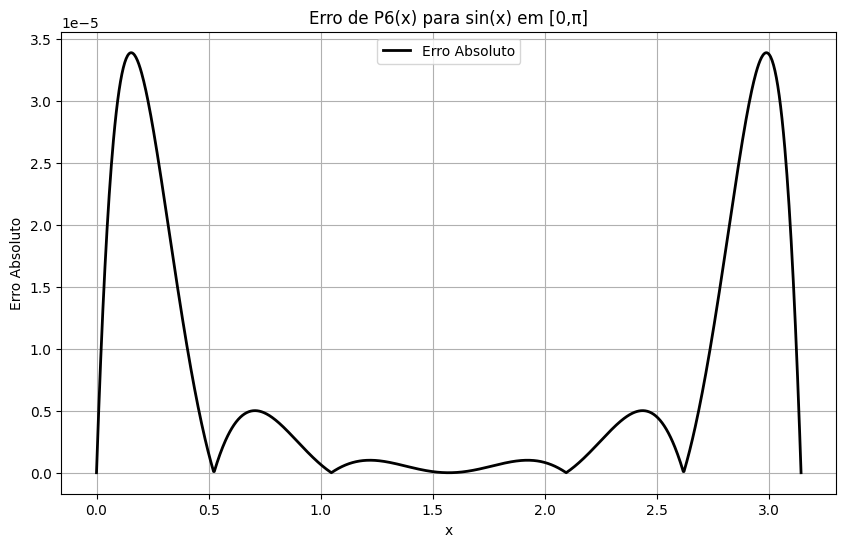

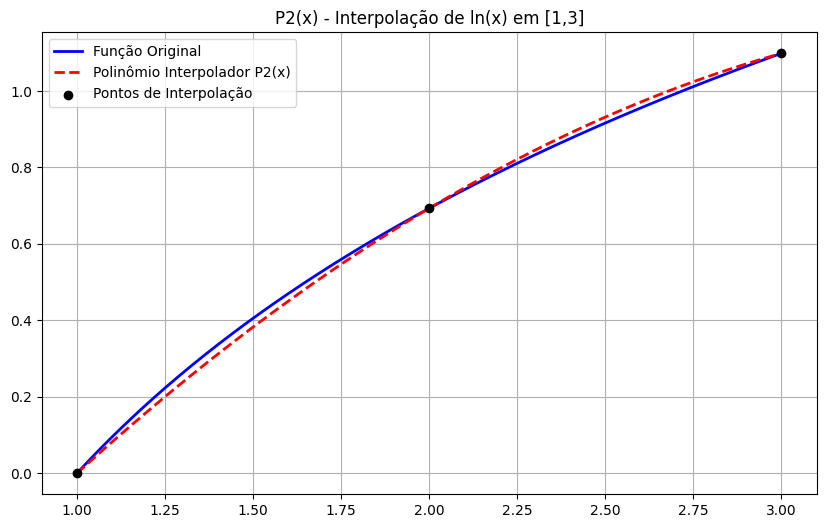

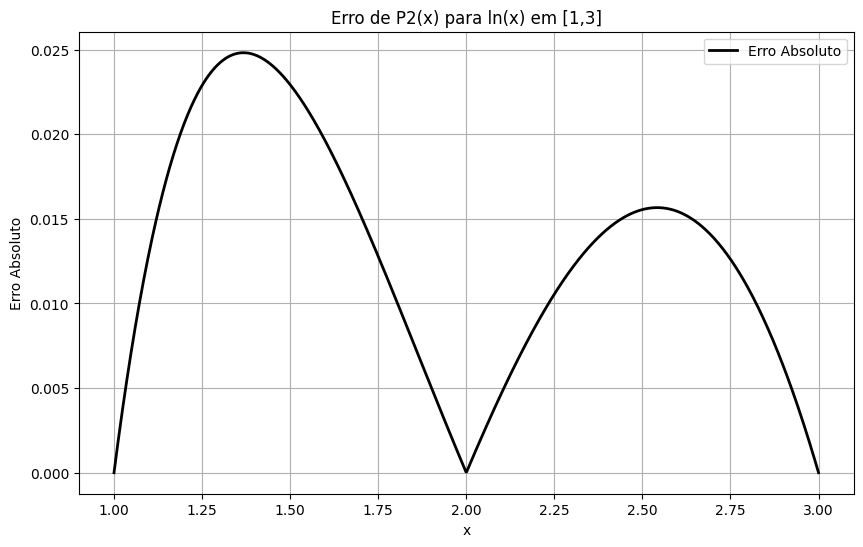

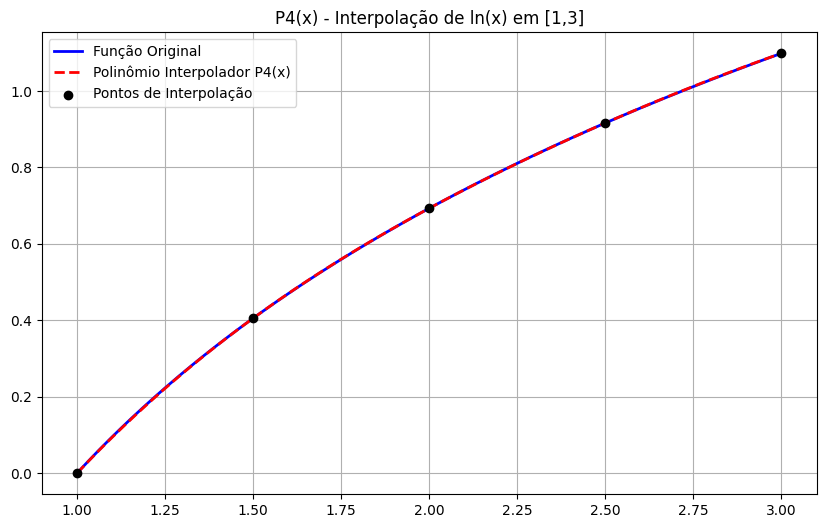

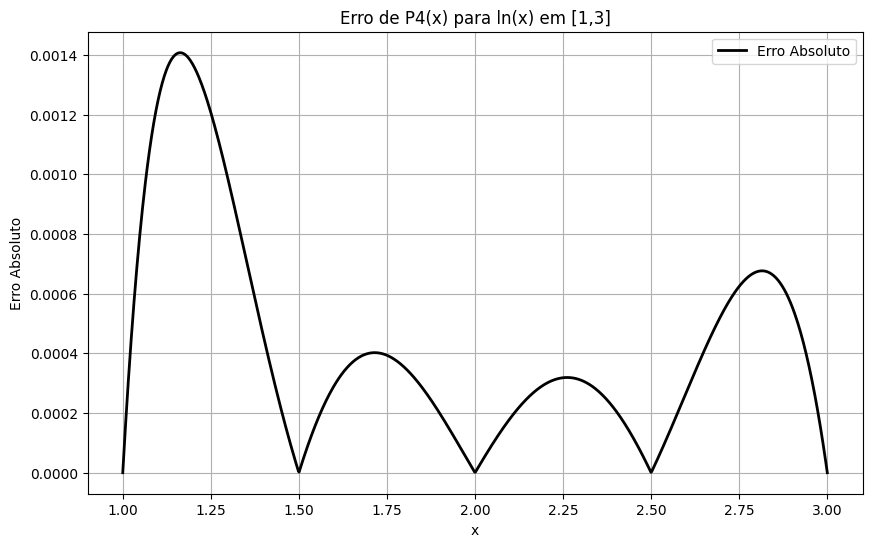

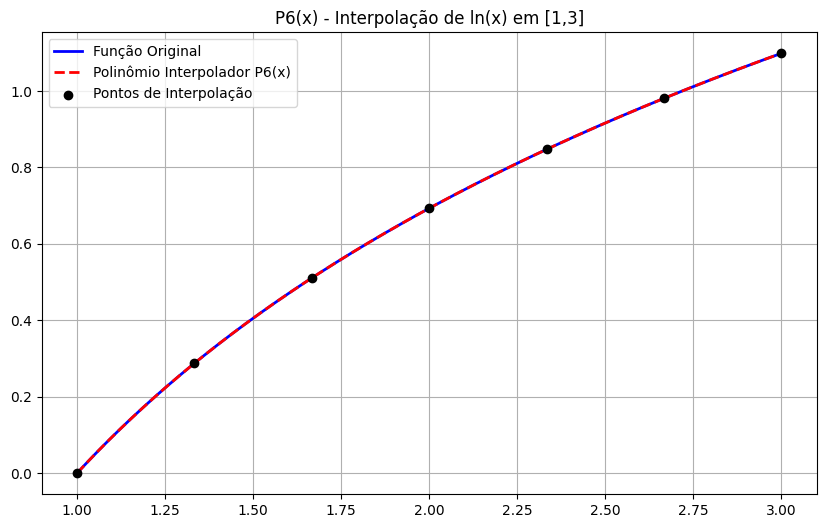

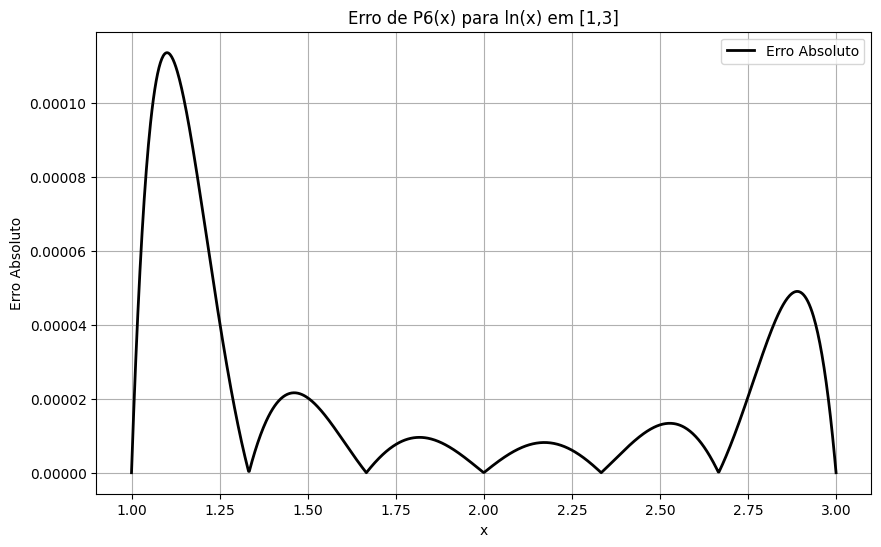

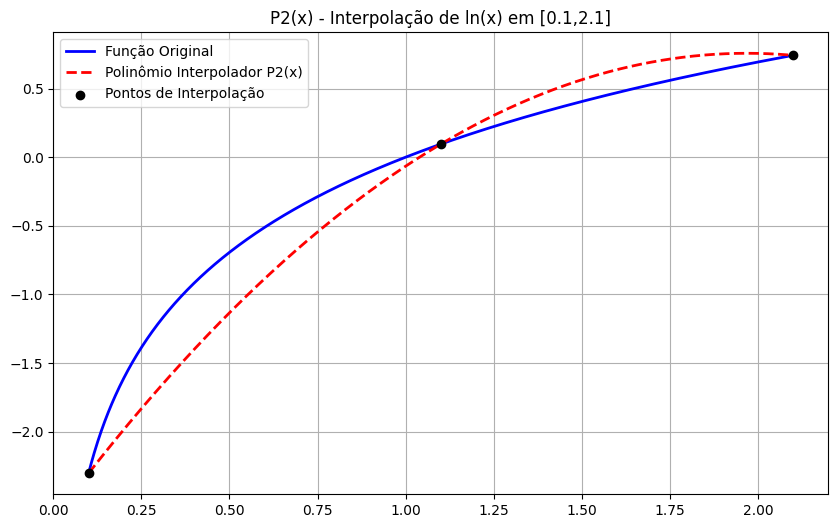

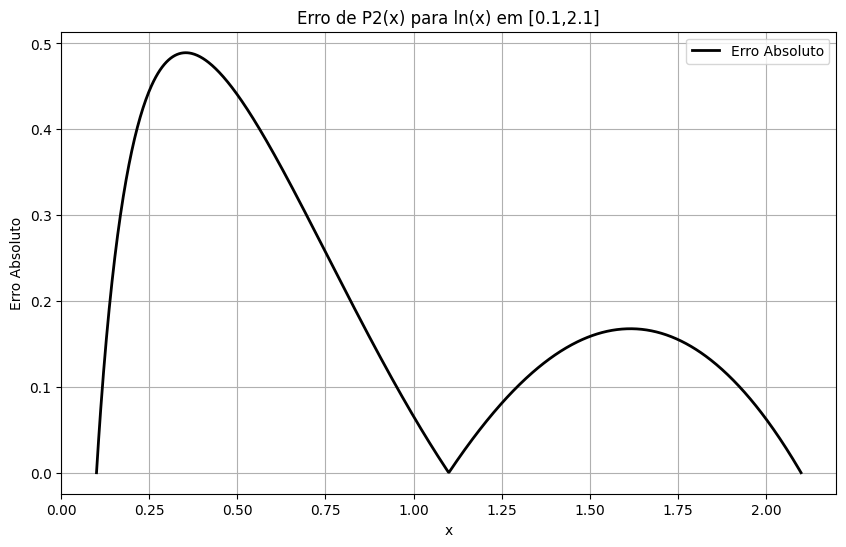

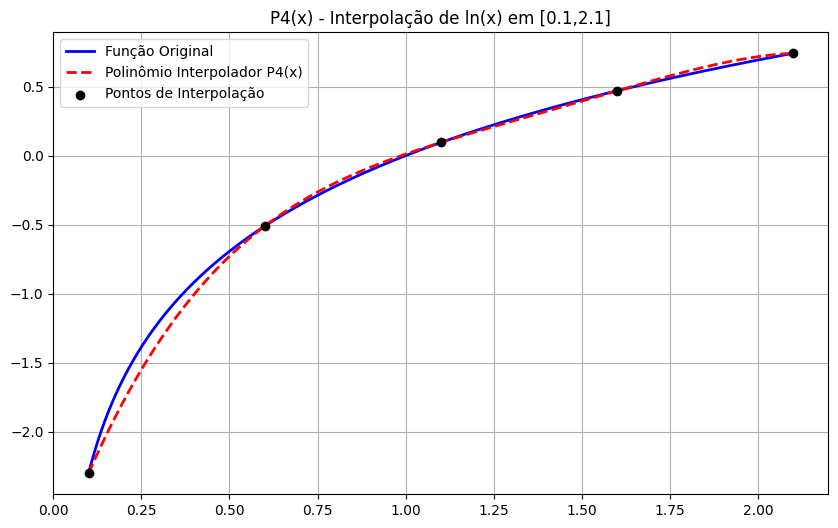

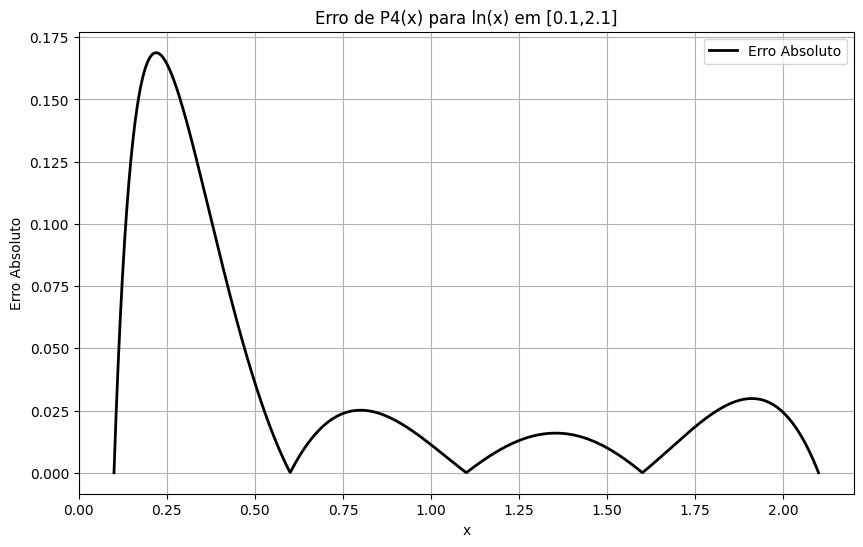

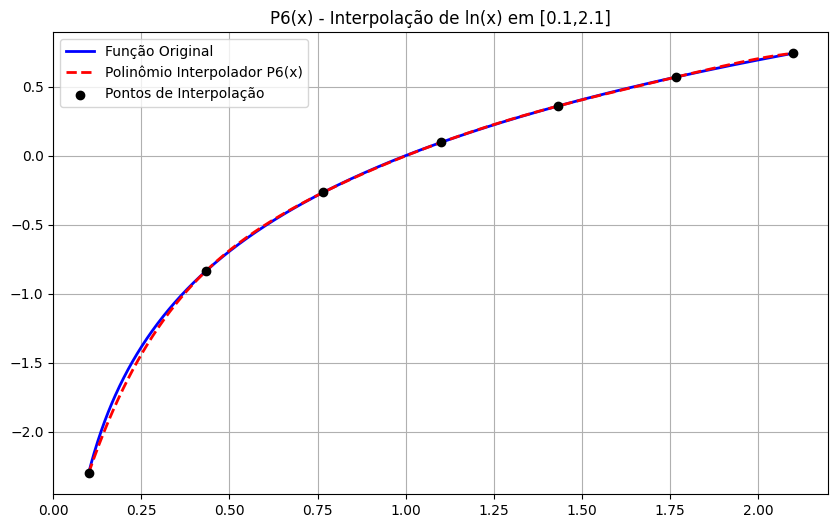

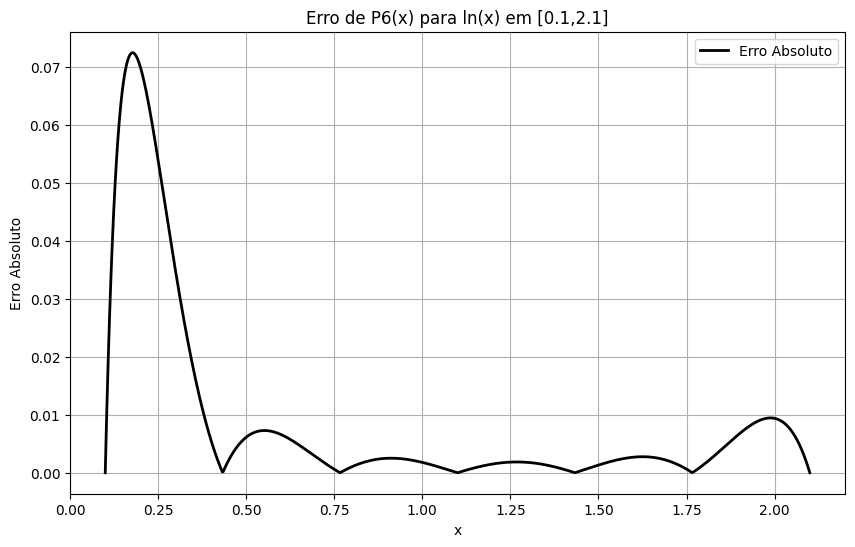

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

# Funções e limites
def funcA(x):
    return np.sin(x)

def funcB(x):
    return np.log(x)

# Função para calcular o erro de interpolação
def erro_interpolacao(func, polinomio, x):
    return np.abs(func(x) - polinomio(x))

# Definição de limites
limitesA = [0, np.pi]
limitesB = [1, 3]
limitesC = [0.1, 2.1]

domA = np.linspace(limitesA[0], limitesA[1], 100)
domB = np.linspace(limitesB[0], limitesB[1], 100)
domC = np.linspace(limitesC[0], limitesC[1], 100)

# Funções e limites para plotagem
functions = [funcA, funcB, funcB]  # funcA para A, funcB para B e C
limits = [limitesA, limitesB, limitesC]
domains = [domA, domB, domC]
labels = ['sin(x) em [0,π]', 'ln(x) em [1,3]', 'ln(x) em [0.1,2.1]']

# Graus dos polinômios
graus = [2, 4, 6]

# Loop sobre as funções, para cada grau de polinômio
for idx, func in enumerate(functions):
    for grau in graus:
        # Gerar os pontos de interpolação
        x_points = np.linspace(limits[idx][0], limits[idx][1], grau + 1)
        y_points = func(x_points)
        
        # Obter o polinômio interpolador de Lagrange
        poly = lagrange(x_points, y_points)
        
        # Plotando a função original e o polinômio interpolador
        plt.figure(figsize=(10, 6))
        x_fine = np.linspace(limits[idx][0], limits[idx][1], 1000)
        plt.plot(x_fine, func(x_fine), 'b-', label='Função Original', linewidth=2)
        plt.plot(x_fine, poly(x_fine), 'r--', label=f'Polinômio Interpolador P{grau}(x)', linewidth=2)
        plt.scatter(x_points, y_points, color='black', zorder=5, label='Pontos de Interpolação')
        plt.title(f'P{grau}(x) - Interpolação de {labels[idx]}')
        plt.legend(loc='best')
        plt.grid(True)
        plt.show()

        # Calculando e plotando o erro de interpolação
        erro = erro_interpolacao(func, poly, x_fine)
        plt.figure(figsize=(10, 6))
        plt.plot(x_fine, erro, 'k-', label='Erro Absoluto', linewidth=2)
        plt.title(f'Erro de P{grau}(x) para {labels[idx]}')
        plt.xlabel('x')
        plt.ylabel('Erro Absoluto')
        plt.grid(True)
        plt.legend(loc='best')
        plt.show()


<b> EXERCÍCIO 3</b><br> 

Implementação um algoritmo em Octave ( deve estar o algoritmo implemnatado em Octave (ou outra linguagem)) que avalie uma função qualquer, podendo ser dada na forma analitica ou tabelada, através de interpolação a partir de bases de polinômios de Lagrange.


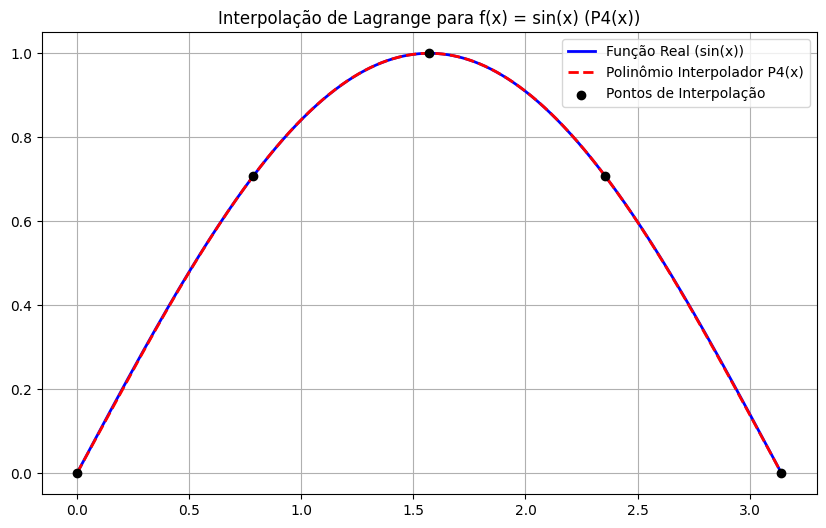

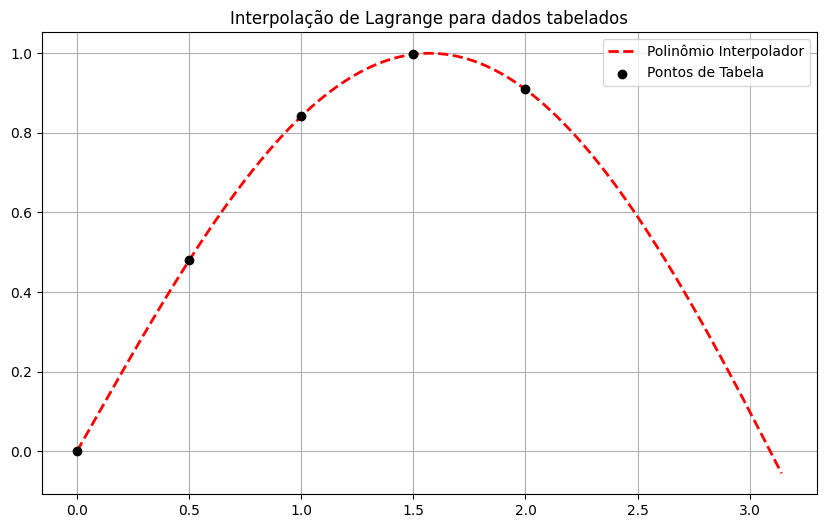

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

def exercicio03(n, dominio, modoEntrada, *args):
    """
    Função que calcula o polinômio interpolador de Lagrange.
    
    Parâmetros:
    n: grau do polinômio.
    dominio: intervalo [lim_min, lim_max] de avaliação de Pn(x).
    modoEntrada: 'fun_anl' para função analítica ou 'table' para tabela de dados.
    args: função analítica ou dados de tabela (valores de X e Y).
    
    Retorna:
    Pn: Polinômio interpolador de Lagrange de grau n.
    PLagrange: Lista contendo os polinômios de Lagrange individuais.
    """
    
    if modoEntrada == 'fun_anl':  # Se a entrada for uma função analítica
        f = args[0]  # Função fornecida pelo usuário
        limites = args[1]  # Limites do intervalo
        x = np.linspace(limites[0], limites[1], n+1)  # Pontos de interpolação
        y = f(x)  # Avaliação da função nos pontos x
    elif modoEntrada == 'table':  # Se a entrada for uma tabela de pontos
        x = args[0]  # Valores de X fornecidos
        y = args[1]  # Valores de Y fornecidos
    else:
        raise ValueError("Modo de entrada inválido. Use 'fun_anl' ou 'table'.")
    
    # Inicialização do polinômio interpolador Pn(x) como zero
    Pn = np.zeros_like(dominio)
    
    # Armazenamento dos polinômios de Lagrange individuais
    PLagrange = []
    
    # Calculando o polinômio de Lagrange
    for k in range(n+1):
        L = np.ones_like(dominio)
        
        # Fórmula do polinômio de Lagrange L_k(x)
        for j in range(n+1):
            if j != k:
                L *= (dominio - x[j]) / (x[k] - x[j])
        
        PLagrange.append(L)  # Armazena a base de Lagrange
        Pn += y[k] * L  # Soma o termo correspondente ao polinômio Pn(x)
    
    return Pn, PLagrange


# Exemplo de uso com função analítica

# Função analítica f(x) = sin(x)
def f(x):
    return np.sin(x)

# Definindo o intervalo e o grau do polinômio
limites = [0, np.pi]
dominio = np.linspace(0, np.pi, 1000)  # Para avaliar o polinômio no intervalo
n = 4  # Grau do polinômio

# Chamando a função para calcular o polinômio de Lagrange
Pn, PLagrange = exercicio03(n, dominio, 'fun_anl', f, limites)

# Plote do polinômio interpolador e da função original
y_real = f(dominio)
plt.figure(figsize=(10, 6))
plt.plot(dominio, y_real, 'b', label='Função Real (sin(x))', linewidth=2)
plt.plot(dominio, Pn, 'r--', label=f'Polinômio Interpolador P{n}(x)', linewidth=2)
plt.scatter(np.linspace(limites[0], limites[1], n+1), f(np.linspace(limites[0], limites[1], n+1)), color='black', zorder=5, label='Pontos de Interpolação')
plt.legend(loc='best')
plt.title(f'Interpolação de Lagrange para f(x) = sin(x) (P{n}(x))')
plt.grid(True)
plt.show()


# Exemplo de uso com tabela de pontos

# Definindo os pontos da tabela
x_table = np.array([0, 0.5, 1, 1.5, 2])
y_table = np.sin(x_table)  # Função sin(x) nos pontos da tabela

# Chamando a função para calcular o polinômio de Lagrange
Pn_table, PLagrange_table = exercicio03(len(x_table)-1, dominio, 'table', x_table, y_table)

# Plote do polinômio interpolador e da tabela de pontos
plt.figure(figsize=(10, 6))
plt.plot(dominio, Pn_table, 'r--', label='Polinômio Interpolador', linewidth=2)
plt.scatter(x_table, y_table, color='black', zorder=5, label='Pontos de Tabela')
plt.legend(loc='best')
plt.title(f'Interpolação de Lagrange para dados tabelados')
plt.grid(True)
plt.show()


<b> EXERCÍCIO 4</b>

1) Utilizando o algoritmo implementado na questão anterior, escreva em uma tabela, os valores dos 5 polinômios de grau 4, para valores de  x ∈ [-1,1], em intervalos de 0,25, considerando como "nós" os valores x<sub>i</sub> = -1.0, -0.5, 0.0, 0.5, 1.0

2) Calcule, com base no valores da tabela acima, os valores se sen(x) para cada x, intermediario, completando a última coluna da tabela.


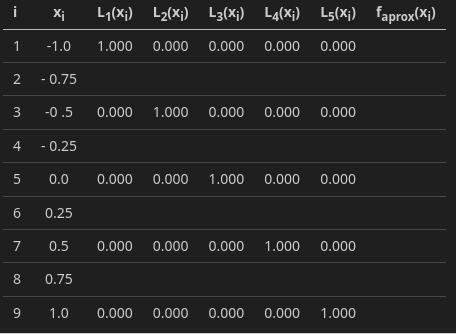

In [4]:
import numpy as np
import math

# Função para calcular o polinômio de Lagrange L_k(x)
def lagrange_basis(x, xi, k):
    Lk = np.ones_like(x)
    for i in range(len(xi)):
        if i != k:
            Lk *= (x - xi[i]) / (xi[k] - xi[i])
    return Lk

# Função para calcular o polinômio interpolador de Lagrange
def lagrange_interpolation(xi, yi, x):
    grau = len(xi) - 1
    Pn = np.zeros_like(x)
    for k in range(grau + 1):
        Lk = lagrange_basis(x, xi, k)
        Pn += yi[k] * Lk
    return Pn

# Nós de interpolação e valores da função sin(x)
xi = np.array([-1.0, -0.5, 0.0, 0.5, 1.0])
yi = np.sin(xi)

# Domínio de avaliação dos polinômios de Lagrange
dominio = np.arange(-1, 1.25, 0.25)

# Inicializando a tabela para armazenar os resultados
tabela = np.zeros((len(dominio), len(xi) + 1))

# Preenchendo a tabela com os valores de x (primeira coluna)
tabela[:, 0] = dominio

# Calculando os polinômios de Lagrange para cada valor de xi
PLagrange = []
for k in range(len(xi)):
    Lk_values = lagrange_basis(dominio, xi, k)
    tabela[:, k + 1] = Lk_values
    PLagrange.append(Lk_values)

# Calculando os valores aproximados do polinômio interpolador
f_aprox = lagrange_interpolation(xi, yi, dominio)

# Preenchendo a última coluna com os valores aproximados f_aprox
tabela[:, -1] = f_aprox

# Exibindo a tabela de resultados
print("Tabela de Polinômios de Lagrange e Aproximação de f(x):")
print("  i  |   x_i   |   L1(x_i)   |   L2(x_i)   |   L3(x_i)   |   L4(x_i)   |   f_aprox(x_i)")
print("-" * 85)
for i, row in enumerate(tabela):
    print(f"{i+1:4} | {row[0]:8.2f} | {row[1]:12.4f} | {row[2]:12.4f} | {row[3]:12.4f} | {row[4]:12.4f} | {row[5]:12.4f}")



Tabela de Polinômios de Lagrange e Aproximação de f(x):
  i  |   x_i   |   L1(x_i)   |   L2(x_i)   |   L3(x_i)   |   L4(x_i)   |   f_aprox(x_i)
-------------------------------------------------------------------------------------
   1 |    -1.00 |       1.0000 |       0.0000 |      -0.0000 |       0.0000 |      -0.8415
   2 |    -0.75 |       0.2734 |       1.0938 |      -0.5469 |       0.2188 |      -0.6825
   3 |    -0.50 |      -0.0000 |       1.0000 |       0.0000 |      -0.0000 |      -0.4794
   4 |    -0.25 |      -0.0391 |       0.4688 |       0.7031 |      -0.1562 |      -0.2470
   5 |     0.00 |       0.0000 |      -0.0000 |       1.0000 |       0.0000 |       0.0000
   6 |     0.25 |       0.0234 |      -0.1562 |       0.7031 |       0.4688 |       0.2470
   7 |     0.50 |      -0.0000 |       0.0000 |      -0.0000 |       1.0000 |       0.4794
   8 |     0.75 |      -0.0391 |       0.2188 |      -0.5469 |       1.0938 |       0.6825
   9 |     1.00 |       0.0000 |      -0.0

<b> EXERCÍCIO 5</b>


Aproxime Função, 

$$
\frac{1}{1 + 25x_2} 
$$

No intervalo x ∈ [-1,1], através de um polinômio de Lagrange de 4 e 8 graus, considerando pontos igualmente espaçados. Plote em um mesmo gráfico a função e o polinômio interpolador. Plote em outro gráfico o erro de interpolação, com a função x. Avalie o valor da função, utilizando ambas aproximações em x = 0.0 e em x = 0. 75. Aproxime agora a mesma função através de um polinônimo de 8° grau , considerando os valores de x  na mesma quandidade ( 9 pontos), porém distribuidos de acordo com.


$$
x_i = \frac{2_i - 1}{2n} ; i = 1 ... n
$$

|  x<sub>1</sub>  | x<sub>2</sub> |  x<sub>3</sub>|  x<sub>4</sub>|  x<sub>5</sub>|  x<sub>6</sub>| x<sub>7</sub>| x<sub>8</sub>|x<sub>9</sub>|
| ------ | :-----------------------: |---- |---- |---- |---- |---- |---- |---- |
| -0.984808 | -0.866025 | -0.642788 |-0.34202 |0.0 | 0.34202 | 0.642788 |0.866025| 0.984808 |

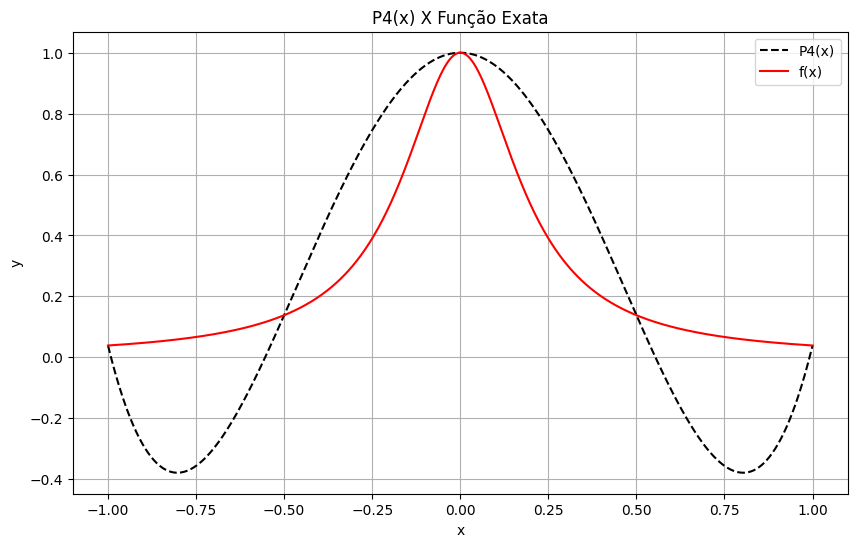

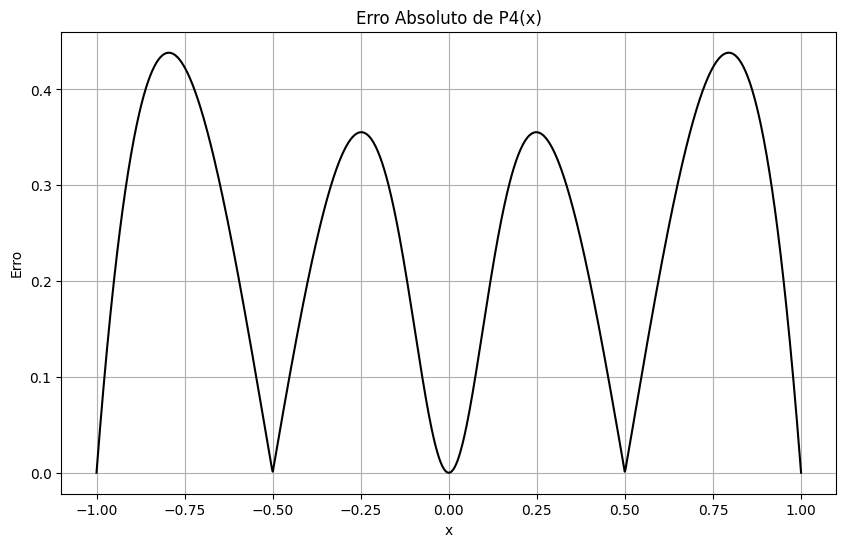

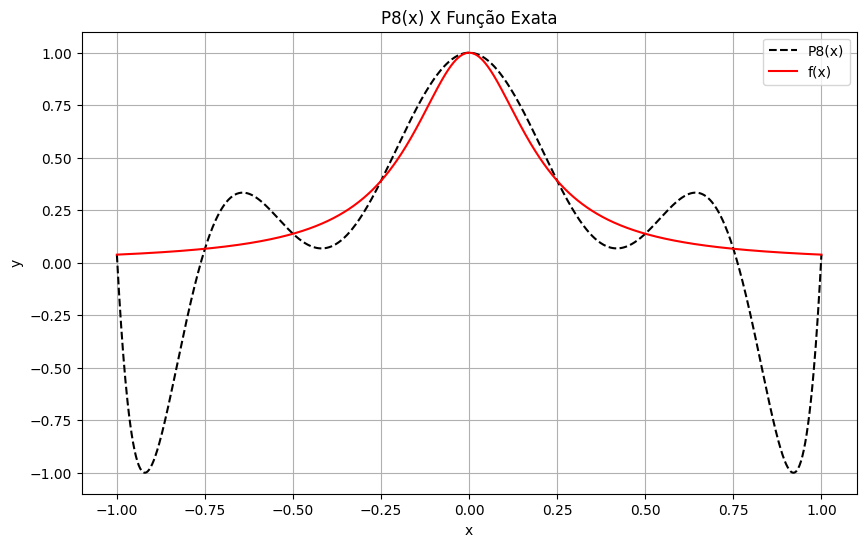

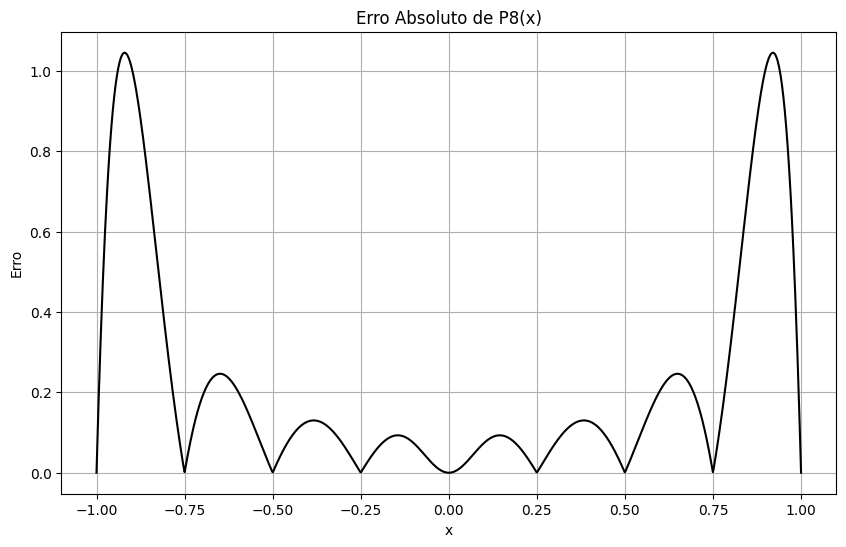

P4(0) = 1.00000
P8(0) = 0.99999
P4(0.75) = -0.35662
P8(0.75) = 0.06772


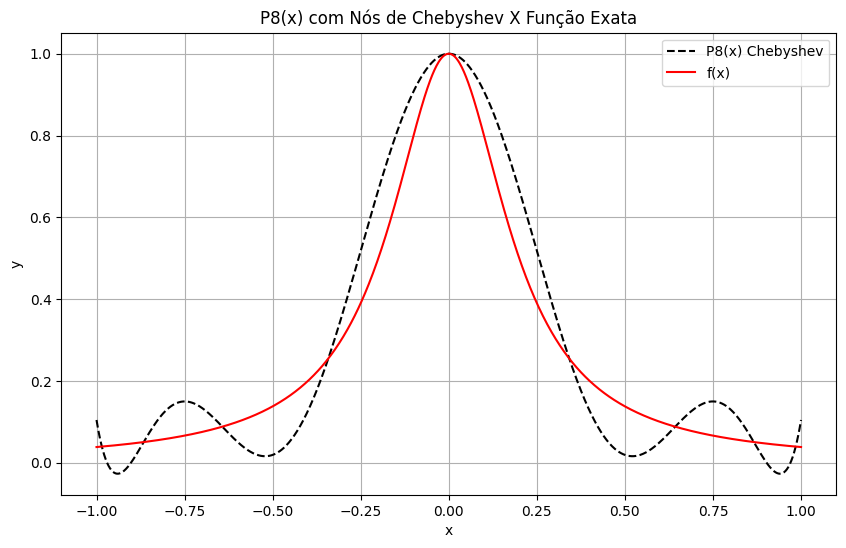

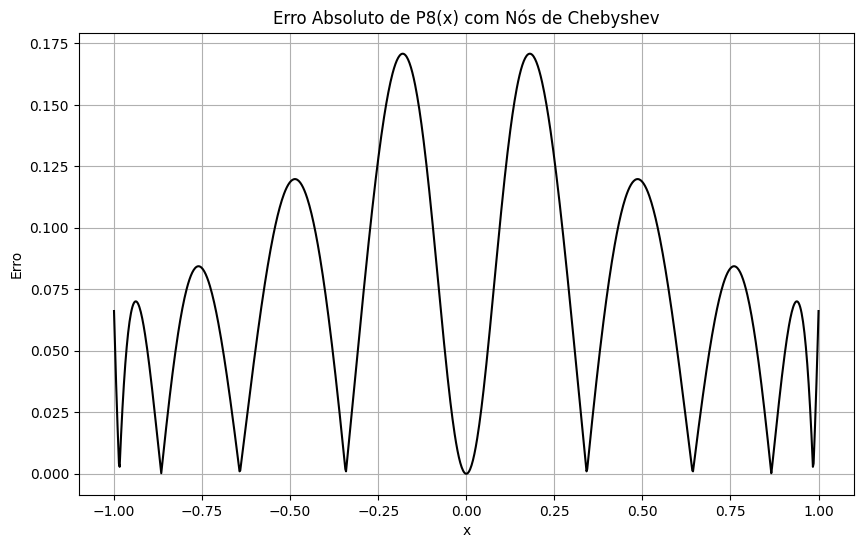

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Função original f(x) = 1 / (1 + 25 * x^2)
def fx(x):
    return 1 / (1 + 25 * x**2)

# Função para calcular os polinômios de Lagrange
def lagrange_polynomial(x, xi, yi):
    n = len(xi)
    L = np.zeros(len(x))  # Inicializa o vetor para armazenar o polinômio
    for k in range(n):
        Lk = np.ones(len(x))  # Inicializa o L_k(x)
        for j in range(n):
            if j != k:
                Lk *= (x - xi[j]) / (xi[k] - xi[j])
        L += Lk * yi[k]  # Soma os termos L_k(x) * f(xk)
    return L

# Definição do domínio para plotagem (intervalo [-1, 1])
x_domain = np.linspace(-1, 1, 1000)

# Aproximação de grau 4 (5 pontos igualmente espaçados)
xi_4 = np.linspace(-1, 1, 5)
yi_4 = fx(xi_4)

# Aproximação de grau 8 (9 pontos igualmente espaçados)
xi_8 = np.linspace(-1, 1, 9)
yi_8 = fx(xi_8)

# Interpolação de Lagrange para grau 4 e grau 8
P4 = lagrange_polynomial(x_domain, xi_4, yi_4)
P8 = lagrange_polynomial(x_domain, xi_8, yi_8)

# Erro de interpolação para grau 4 e grau 8
erro_4 = np.abs(P4 - fx(x_domain))
erro_8 = np.abs(P8 - fx(x_domain))

# Plotando o gráfico do polinômio de grau 4 e função original
plt.figure(figsize=(10, 6))
plt.plot(x_domain, P4, '--k', label='P4(x)', linewidth=1.5)
plt.plot(x_domain, fx(x_domain), 'r', label='f(x)', linewidth=1.5)
plt.title('P4(x) X Função Exata')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()

# Erro absoluto de P4(x)
plt.figure(figsize=(10, 6))
plt.plot(x_domain, erro_4, 'k', label='Erro de P4(x)', linewidth=1.5)
plt.title('Erro Absoluto de P4(x)')
plt.xlabel('x')
plt.ylabel('Erro')
plt.grid(True)
plt.show()

# Plotando o gráfico do polinômio de grau 8 e função original
plt.figure(figsize=(10, 6))
plt.plot(x_domain, P8, '--k', label='P8(x)', linewidth=1.5)
plt.plot(x_domain, fx(x_domain), 'r', label='f(x)', linewidth=1.5)
plt.title('P8(x) X Função Exata')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()

# Erro absoluto de P8(x)
plt.figure(figsize=(10, 6))
plt.plot(x_domain, erro_8, 'k', label='Erro de P8(x)', linewidth=1.5)
plt.title('Erro Absoluto de P8(x)')
plt.xlabel('x')
plt.ylabel('Erro')
plt.grid(True)
plt.show()

# Avaliação dos polinômios em x = 0.0 e x = 0.75
print(f'P4(0) = {P4[np.abs(x_domain - 0).argmin()]:.5f}')
print(f'P8(0) = {P8[np.abs(x_domain - 0).argmin()]:.5f}')
print(f'P4(0.75) = {P4[np.abs(x_domain - 0.75).argmin()]:.5f}')
print(f'P8(0.75) = {P8[np.abs(x_domain - 0.75).argmin()]:.5f}')

# Aproximação com nós de Chebyshev
n = 9  # Número de pontos (grau 8)
xi_chebyshev = np.cos((2 * np.arange(1, n+1) - 1) * np.pi / (2 * n))  # Nós de Chebyshev
yi_chebyshev = fx(xi_chebyshev)

# Interpolação de Lagrange com nós de Chebyshev
P_chebyshev = lagrange_polynomial(x_domain, xi_chebyshev, yi_chebyshev)

# Plotando o gráfico do polinômio de Chebyshev e função original
plt.figure(figsize=(10, 6))
plt.plot(x_domain, P_chebyshev, '--k', label='P8(x) Chebyshev', linewidth=1.5)
plt.plot(x_domain, fx(x_domain), 'r', label='f(x)', linewidth=1.5)
plt.title('P8(x) com Nós de Chebyshev X Função Exata')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()

# Erro absoluto de P8(x) com Chebyshev
erro_chebyshev = np.abs(P_chebyshev - fx(x_domain))
plt.figure(figsize=(10, 6))
plt.plot(x_domain, erro_chebyshev, 'k', label='Erro de P8(x) Chebyshev', linewidth=1.5)
plt.title('Erro Absoluto de P8(x) com Nós de Chebyshev')
plt.xlabel('x')
plt.ylabel('Erro')
plt.grid(True)
plt.show()


<b> EXERCÍCIO 6</b>

Implemente um algoritmo em Octave ( deve enviar o Algoritmo implemntado em Octave), dado um conjunto de  valores tabelados, faça um ajuste polinomial pelo método dos minimos quadrados, para um valor qualquer de pontos e polinômio de qualquer grau n.

Comandos para fazer a leitura direta dos valores através da função csvread do Octave:


In [10]:
import pandas as pd

# Carregar os dados do arquivo CSV
data = pd.read_csv('Dataset.csv')

# Extrair as colunas x e y
x = data.iloc[:, 0].values  # Primeira coluna (índice 0)
y = data.iloc[:, 1].values  # Segunda coluna (índice 1)

# Exibir as primeiras linhas para verificar se foi carregado corretamente
print(data.head())  # Exibe as primeiras 5 linhas do arquivo


   0.01861406170966111   0.1358024691358024
0             0.029124             0.098765
1             0.043478             0.328395
2             0.047528             0.162963
3             0.059435             0.086420
4             0.060803             0.037037


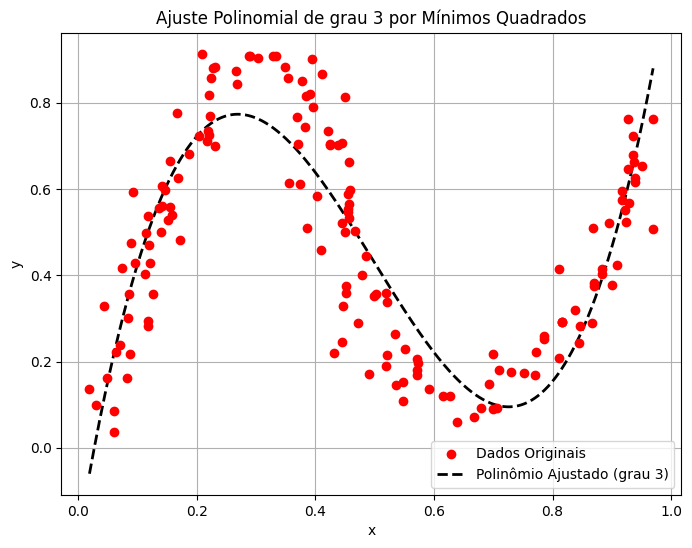

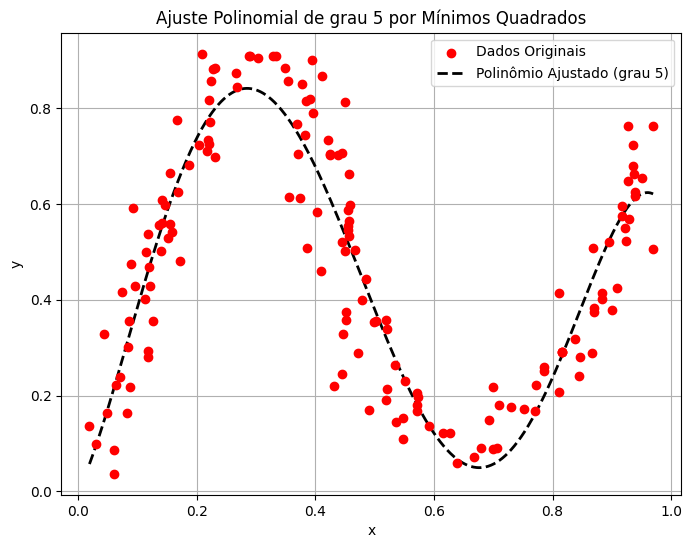

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Função para ajuste polinomial por mínimos quadrados
def ajuste_polinomial(n, datapath, semplot=0):
    # Carregar dados a partir do arquivo .csv
    data = np.loadtxt(datapath, delimiter=',')  # Lê o arquivo CSV
    dadosX = data[:, 0]  # Primeira coluna - X
    dadosY = data[:, 1]  # Segunda coluna - Y
    
    # Construção da matriz de design X para o ajuste polinomial
    X = np.vander(dadosX, n+1)  # Cria a matriz de Vandermonde, que contém X^(j-1)
    
    # Resolve o sistema linear para encontrar os coeficientes do polinômio
    Pn = np.linalg.lstsq(X, dadosY, rcond=None)[0]  # Coeficientes do polinômio
    
    # Se semplot == 0, plota os gráficos
    if semplot == 0:
        # Domínio para o gráfico do polinômio ajustado (gera valores de X no intervalo dos dados)
        dom = np.linspace(min(dadosX), max(dadosX), 1000)
        
        # Calcula os valores do polinômio ajustado Pn nos pontos dom
        Pn_vals = fPnH(n, Pn, dom)
        
        # Plota os dados originais (pontos) e o polinômio ajustado
        plt.figure(figsize=(8, 6))
        plt.scatter(dadosX, dadosY, color='red', label='Dados Originais', zorder=5)
        plt.plot(dom, Pn_vals, '--k', label=f'Polinômio Ajustado (grau {n})', linewidth=2)
        plt.grid(True)
        plt.title(f'Ajuste Polinomial de grau {n} por Mínimos Quadrados')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend(loc='best')
        plt.show()
    
    return Pn

# Função para calcular o valor do polinômio ajustado para qualquer x
def fPnH(n, Pn, dom):
    """
    Calcula o valor do polinômio Pn(x) para um conjunto de pontos dom.
    """
    Pn_vals = np.zeros_like(dom)
    for i in range(n+1):
        Pn_vals += Pn[i] * dom**(n-i)  # Pn(x) = a_n * x^n + a_(n-1) * x^(n-1) + ... + a_0
    return Pn_vals

# Exemplo de uso
if __name__ == "__main__":
    # Defina o caminho do arquivo CSV (certifique-se de substituir pelo caminho correto)
    datapath = 'Dataset.csv'  # Substitua com o caminho real do seu arquivo .csv
    
    # Ajuste polinomial de grau 3
    Pn_grau_3 = ajuste_polinomial(3, datapath, semplot=0)
    
    # Ajuste polinomial de grau 5
    Pn_grau_5 = ajuste_polinomial(5, datapath, semplot=0)
    
    # Caso você queira apenas obter os coeficientes e não plotar, pode fazer:
    # Pn_grau_3 = ajuste_polinomial(3, datapath, semplot=1)


Neste caso se atribui a um vetor com nome " x " os valores da primeira coluna do arquivo e a um vetor " y " os valores da segunda coluna.

<b> EXERCÍCIO 7</b>

Dado o conjunto de pontos mostrados na tabela, determine os polinômios de ajuste de 3° e 5 ° graus, por minimos quadrados. 

A) Avalie o ajuste em x = 1.210 e x = 2.144, determine o valor desvio nestes pontos, para cada valor de n.

B) Plote em um mesmo gráfico os pontos originais e os polinômios de ajuste.


Desvio do polinômio de grau 3 em x = 1.21: 3.53904
Desvio do polinômio de grau 3 em x = 2.144: 60.71718
Desvio do polinômio de grau 5 em x = 1.21: 4.23671
Desvio do polinômio de grau 5 em x = 2.144: 686.19806


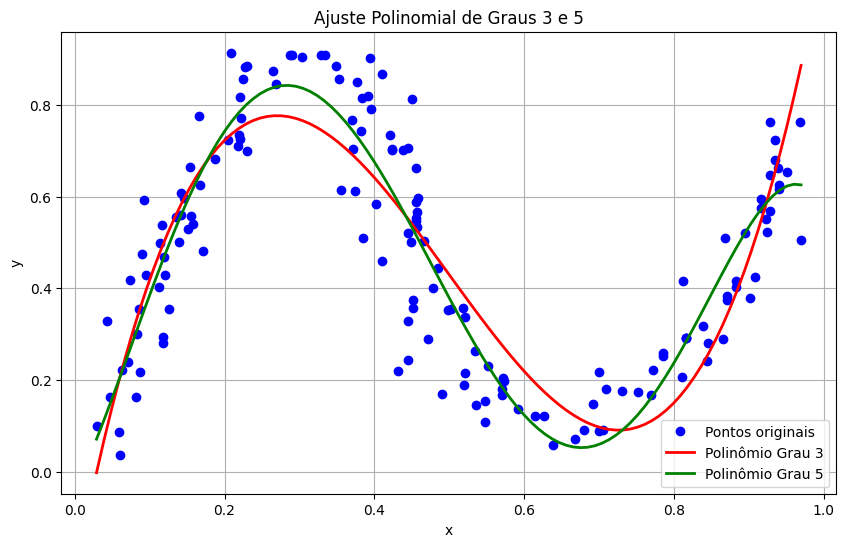

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Função para ajustar o polinômio pelo método dos mínimos quadrados
def ajuste_polinomial(x, y, grau):
    # Criar a matriz de Vandermonde para o grau especificado
    A = np.vander(x, grau + 1, increasing=True)
    # Resolver o sistema de equações para encontrar os coeficientes
    coeficientes = np.linalg.lstsq(A, y, rcond=None)[0]
    return coeficientes

# Função para avaliar o polinômio nos pontos x
def avaliar_polinomio(coeficientes, x):
    return np.polyval(coeficientes[::-1], x)

# Carregar os dados do arquivo CSV
data = pd.read_csv('Dataset.csv')

# Extrair as colunas x e y
x = data.iloc[:, 0].values  # Primeira coluna (índice 0)
y = data.iloc[:, 1].values  # Segunda coluna (índice 1)

# Ajustar o polinômio de grau 3
grau_3 = 3
coef_3 = ajuste_polinomial(x, y, grau_3)

# Ajustar o polinômio de grau 5
grau_5 = 5
coef_5 = ajuste_polinomial(x, y, grau_5)

# Avaliar os polinômios nos pontos x = 1.210 e x = 2.144
x1 = 1.210
x2 = 2.144
y3_1 = avaliar_polinomio(coef_3, x1)
y3_2 = avaliar_polinomio(coef_3, x2)
y5_1 = avaliar_polinomio(coef_5, x1)
y5_2 = avaliar_polinomio(coef_5, x2)

# Calcular o desvio (erro) entre os valores ajustados e reais (dados originais)
desvio_3_x1 = abs(y3_1 - np.interp(x1, x, y))  # Interpola os valores reais em x1
desvio_3_x2 = abs(y3_2 - np.interp(x2, x, y))  # Interpola os valores reais em x2
desvio_5_x1 = abs(y5_1 - np.interp(x1, x, y))  # Interpola os valores reais em x1
desvio_5_x2 = abs(y5_2 - np.interp(x2, x, y))  # Interpola os valores reais em x2

# Mostrar os desvios
print(f'Desvio do polinômio de grau 3 em x = {x1}: {desvio_3_x1:.5f}')
print(f'Desvio do polinômio de grau 3 em x = {x2}: {desvio_3_x2:.5f}')
print(f'Desvio do polinômio de grau 5 em x = {x1}: {desvio_5_x1:.5f}')
print(f'Desvio do polinômio de grau 5 em x = {x2}: {desvio_5_x2:.5f}')

# Plotar os gráficos
plt.figure(figsize=(10, 6))

# Plotar os pontos originais
plt.plot(x, y, 'bo', label='Pontos originais')

# Gerar os polinômios de ajuste para a linha
x_plot = np.linspace(min(x), max(x), 100)
y3_plot = avaliar_polinomio(coef_3, x_plot)
y5_plot = avaliar_polinomio(coef_5, x_plot)

# Plotar os polinômios ajustados
plt.plot(x_plot, y3_plot, 'r-', label='Polinômio Grau 3', linewidth=2)
plt.plot(x_plot, y5_plot, 'g-', label='Polinômio Grau 5', linewidth=2)

# Adicionar título, rótulos e legenda
plt.title('Ajuste Polinomial de Graus 3 e 5')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

# Mostrar o gráfico
plt.show()
